# Weighted Graph

In [35]:
# Each tuple (u,v,w) in list is representing the edge from u to v with weight w
edges = [(0, 1, 10), (0, 2, 80), (1, 2, 6), (1, 4, 20),
         (2, 3, 70), (4, 5, 50), (4, 6, 5), (5, 6, 10)]

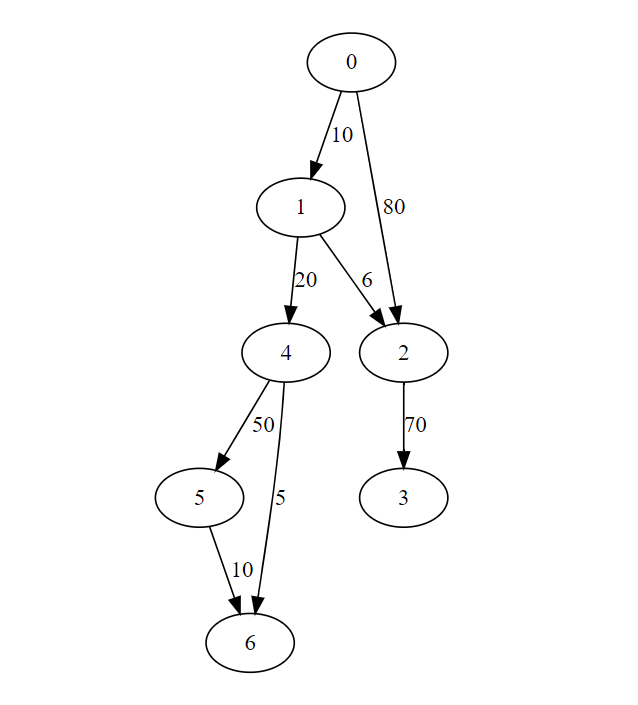

## Adjacency matrix

In [36]:
size = 7
adjacency_matrix = [[-1 for j in range(size)] for i in range(size)]

for u, v, w in edges:
  adjacency_matrix[u][v] = w

adjacency_matrix

[[-1, 10, 80, -1, -1, -1, -1],
 [-1, -1, 6, -1, 20, -1, -1],
 [-1, -1, -1, 70, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, 50, 5],
 [-1, -1, -1, -1, -1, -1, 10],
 [-1, -1, -1, -1, -1, -1, -1]]

In [37]:
size = 7
adjacency_matrix = [[(0, 0) for j in range(size)] for i in range(size)]

for u, v, w in edges:
  adjacency_matrix[u][v] = (1, w)

adjacency_matrix

[[(0, 0), (1, 10), (1, 80), (0, 0), (0, 0), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (1, 6), (0, 0), (1, 20), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (0, 0), (1, 70), (0, 0), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 50), (1, 5)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 10)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]]

## Adjacency list

In [38]:
adjacency_list = {}

for u, v, w in edges:
  if u not in adjacency_list:
    adjacency_list[u] = []
  if v not in adjacency_list:
    adjacency_list[v] = []
  adjacency_list[u].append((v, w))

adjacency_list

{0: [(1, 10), (2, 80)],
 1: [(2, 6), (4, 20)],
 2: [(3, 70)],
 4: [(5, 50), (6, 5)],
 3: [],
 5: [(6, 10)],
 6: []}

# Dijkstra's Algorithm

**Single source shortest path algorithm**

### Algorithm 1

Use a loop to repeatedly select the unvisited vertex with the smallest known distance, mark it as visited, and update distances to its neighbors until all vertices are processed.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Initialize `visited` to track visited vertices (`False` initially).
   - Initialize `distances` with shortest distances from `start_vertex` (`inf` initially, `0` for `start_vertex`).

2. **Main Loop**:
   - **Iterate until all vertices processed**:
     - Find the unvisited vertex `current_vertex` with smallest known distance.
     - Break if no `current_vertex` found (all visited).
     - Mark `current_vertex` as visited.
     - Update distances to its neighbors:
       - Calculate new distances through `current_vertex`.
       - Update if shorter path found (`distances[neighbor]`).

3. **Result**:
   - `distances` has shortest paths from `start_vertex` to all vertices.

In [46]:
def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distances = {vertex: float('inf') for vertex in adjacency_list}
  distances[start_vertex] = 0

  # loop until all vertices have been processed
  while True:
    # find the vertex with the smallest distance among unvisited vertices
    current_vertex = None
    for vertex in adjacency_list:
      if not visited[vertex]:
        if current_vertex is None or distances[vertex] < distances[current_vertex]:
          current_vertex = vertex

    if current_vertex is None:
      break  # no more vertices to process

    visited[current_vertex] = True

    # update distances to neighbors
    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distances[current_vertex] + weight
        if new_distance < distances[neighbor]:
          distances[neighbor] = new_distance

  return distances


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

True

### Algorithm 2

Use a priority queue to repeatedly dequeue the vertex with the smallest known distance, update distances to its neighbors, and enqueue them with updated distances until the queue is empty.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Create a `PriorityQueue` `pq`.
   - Initialize `distances` with shortest distances from `start_vertex` (`inf` initially, `0` for `start_vertex`).
   - Enqueue `start_vertex` with priority `0`.

2. **Main Loop**:
   - **Iterate until the priority queue is empty**:
     - Dequeue `current_vertex` from `pq`.
     - For each neighbor of `current_vertex`:
       - Calculate new distance `new_distance`.
       - Update `distances[neighbor]` if `new_distance` is shorter.
       - Enqueue `neighbor` with `new_distance`.

3. **Result**:
   - `distances` has shortest paths from `start_vertex` to all vertices.

In [45]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, item, priority):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]


def dijkstra(adjacency_list, start_vertex):
  pq = PriorityQueue()
  distances = {vertex: float('inf') for vertex in adjacency_list}
  distances[start_vertex] = 0
  pq.enqueue(start_vertex, 0)

  # process the queue until it's empty
  while not pq.is_empty():
    current_vertex = pq.dequeue()

    # update distances to neighbors
    for neighbor, weight in adjacency_list[current_vertex]:
      new_distance = distances[current_vertex] + weight
      if new_distance < distances[neighbor]:
        distances[neighbor] = new_distance
        pq.enqueue(neighbor, new_distance)

  return distances


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

True